## INSTRUCTIONS

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution.

The homework consists of two parts:
1.	Data manipulation
2.	Exploratory Data Analysis

Follow the prompts in the attached jupyter notebook. Download the data and place it in your working directory, or modify the path to upload it to your notebook. Add markdown cells to your analysis to include your solutions, comments, answers. Add as many cells as you need, for easy readability comment when possible.
Hopefully this homework will help you develop skills, make you understand the flow of an EDA, get you ready for individual work.

Submission: Send in both a ipynb and a pdf file of your work.

Good luck!


# Part1: Cleaning, wrangling data

**Data cleaning focuses on removing inaccurate data from your data set whereas data wrangling focuses on transforming the data's format, typically by converting “raw” data into another format more suitable for use.
This excersize uses the traffic_cameras file. Your task is to follow prompts to change, modify your data. Try your best!**

In [149]:
#read in libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn import preprocessing
import pandas as pd


In [3]:
from google.colab import drive
drive.mount('/content/drive')

# Reading the CSV file
df = pd.read_csv('/content/drive/MyDrive/traffic_cameras.csv')

# Printing top 5 rows
df.head()

Mounted at /content/drive


,Camera ID,Location Name,Camera Status,Turn on Date,Camera Manufacturer,ATD Location ID,Landmark,Signal Engineer Area,Council District,Jurisdiction,...,CROSS_ST_AKA,COA Intersection ID,Modified Date,IP Comm Status,IP Comm Status Date and Time,Published Screenshots,Screenshot Address,Funding,ID,Location
0,370,PLEASANT VALLEY RD / NUCKOLS CROSSING RD,TURNED_ON,5/24/2018,Advidia,LOC16-003180,NaN,SOUTHEAST,2,AUSTIN FULL PURPOSE,...,NaN,5157009.0,10/28/2021 08:40:00 AM +0000,ONLINE,10/28/2021 08:30:00 AM +0000,NaN,https://cctv.austinmobility.io/image/370.jpg,1/4 Cent,591a10a020eacf2d16669b94,POINT (-97.7449036 30.1844883)
1,379,BARTON SPRINGS RD / KINNEY AVE,TURNED_ON,5/21/2018,Advidia,LOC16-000640,NaN,SOUTHWEST,5,AUSTIN FULL PURPOSE,...,NaN,5154418.0,10/29/2021 08:45:00 AM +0000,ONLINE,10/29/2021 08:35:00 AM +0000,NaN,https://cctv.austinmobility.io/image/379.jpg,1/4 Cent,591a10a020eacf2d16669ba6,POINT (-97.761467 30.261982)
2,404,SPRINGDALE RD / OAK SPRINGS DR,TURNED_ON,6/7/2018,Advidia,LOC16-000800,NaN,NORTHEAST,"3, 1",AUSTIN FULL PURPOSE,...,NaN,5163165.0,10/29/2021 07:38:00 PM +0000,ONLINE,10/28/2021 08:35:00 AM +0000,NaN,https://cctv.austinmobility.io/image/404.jpg,1/4 Cent,591a10a120eacf2d16669bd8,POINT (-97.6904221 30.2735615)
3,447,BRAKER LN / STONELAKE BLVD,TURNED_ON,9/9/2016,Advidia,LOC16-003740,NaN,NORTHWEST,7,AUSTIN FULL PURPOSE,...,NaN,5156985.0,10/29/2021 07:49:00 PM +0000,ONLINE,10/23/2021 08:35:00 AM +0000,NaN,https://cctv.austinmobility.io/image/447.jpg,1/4 Cent,591a10a320eacf2d16669c2e,POINT (-97.7392883 30.3989582)
4,552,EXPOSITION BLVD / WESTOVER RD,TURNED_ON,2/24/2020,Advidia,LOC16-003710,NaN,CENTRAL,10,AUSTIN FULL PURPOSE,...,NaN,5153874.0,10/29/2021 07:47:00 PM +0000,ONLINE,10/20/2021 08:35:00 AM +0000,NaN,https://cctv.austinmobility.io/image/552.jpg,None Identified,5aa6bb0121cbcf4b8b767294,POINT (-97.7643051 30.3030338)


### 1. How many rows and columns does your data have?

In [150]:
# Use shape function to easily find number of rows and cols
numRow = df.shape[0]
numCol = df.shape[1]
print(numRow)
print(numCol)


802
28


### 2. What can you tell us about the type of variables we have?

In [151]:
# dtypes tells you all non null variable types in the dataset
df.dtypes


Camera ID                         int64
Location Name                    object
Camera Status                    object
Turn on Date                     object
Camera Manufacturer              object
ATD Location ID                  object
Landmark                         object
Signal Engineer Area             object
Council District                 object
Jurisdiction                     object
Location Type                    object
Primary St Segment ID           float64
Cross St Segment ID             float64
Primary Street Block            float64
Primary Street                   object
PRIMARY_ST_AKA                  float64
Cross Street Block              float64
Cross Street                     object
CROSS_ST_AKA                    float64
COA Intersection ID             float64
Modified Date                    object
IP Comm Status                   object
IP Comm Status Date and Time     object
Published Screenshots           float64
Screenshot Address               object


Most Columns have the data type of object. The second most common type is float64 and only one column has int64.






### 3. Delete only the columns that have all null values, name it df1 (nothing else, but null)

In [152]:
# Dropna is used to delete columns or rows with null values
# axis=1 is used to drop columns and 'all' is used to only drop column with all null values
df1 = df.dropna(axis=1, how="all")



In [153]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Camera ID                     802 non-null    int64  
 1   Location Name                 802 non-null    object 
 2   Camera Status                 802 non-null    object 
 3   Turn on Date                  442 non-null    object 
 4   Camera Manufacturer           646 non-null    object 
 5   ATD Location ID               802 non-null    object 
 6   Landmark                      94 non-null     object 
 7   Signal Engineer Area          799 non-null    object 
 8   Council District              790 non-null    object 
 9   Jurisdiction                  799 non-null    object 
 10  Location Type                 802 non-null    object 
 11  Primary Street Block          800 non-null    float64
 12  Primary Street                801 non-null    object 
 13  Cross

### 4. Dropp columns that have (any) null values name it df2

In [154]:
# The 'any' is used to drop columns that have at least one null value
df2 = df.dropna(axis=1, how="any")


In [155]:
df2.info()
df2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Camera ID                     802 non-null    int64 
 1   Location Name                 802 non-null    object
 2   Camera Status                 802 non-null    object
 3   ATD Location ID               802 non-null    object
 4   Location Type                 802 non-null    object
 5   Modified Date                 802 non-null    object
 6   IP Comm Status                802 non-null    object
 7   IP Comm Status Date and Time  802 non-null    object
 8   Screenshot Address            802 non-null    object
 9   ID                            802 non-null    object
 10  Location                      802 non-null    object
dtypes: int64(1), object(10)
memory usage: 69.0+ KB


(802, 11)

### 5. Rename column names in df2 so they are more usable (name the new dataframe df3) to the followings: cam_id, loc_name, cam_stat, atd_loc_id, loc_type, date, comm_stat, comm_stat_date, screen_addr, id, location

In [156]:
# Rename method is used to rename the columns when the original name is passed is
df3 = df2.rename(columns={"Camera ID": "cam_id", "Location Name": "loc_name", "Camera Status": "cam_stat", "ATD Location ID": "atd_loc_id", "Location Type": "loc_type", "Modified Date": "date", "IP Comm Status": "comm_stat", "IP Comm Status Date and Time": "comm_stat_date", "Screenshot Address": "screen_addr", "ID": "id", "Location": "location"})


In [157]:
df3.head

<bound method NDFrame.head of      cam_id                                           loc_name   cam_stat  \
0       370           PLEASANT VALLEY RD / NUCKOLS CROSSING RD  TURNED_ON   
1       379                     BARTON SPRINGS RD / KINNEY AVE  TURNED_ON   
2       404                     SPRINGDALE RD / OAK SPRINGS DR  TURNED_ON   
3       447                         BRAKER LN / STONELAKE BLVD  TURNED_ON   
4       552                      EXPOSITION BLVD / WESTOVER RD  TURNED_ON   
..      ...                                                ...        ...   
797    1190                             GUADALUPE ST / 46TH ST  TURNED_ON   
798    1274                    CESAR CHAVEZ ST / SAN MARCOS ST  TURNED_ON   
799    1275                     BURNET RD / RESEARCH BLVD SVRD  TURNED_ON   
800    1276   BASTROP HWY / MONTOPOLIS TO BASTROP NB RAMP (...  TURNED_ON   
801    1277                       BURNET RD / BRIGHT VERDE WAY  TURNED_ON   

       atd_loc_id loc_type                   

### 6. Split "date" column into two  new columns within df3 ('Dates' and 'Time') /modify df3 data/

In [158]:
# Splits the date column on the first space using 'n=1'
# Splits it into Dates and Time
df3[['Dates', 'Time']] = df3.date.str.split(' ', n=1, expand = True)

# Drops the previos date column
df3 = df3.drop(columns= ['date'])


In [159]:
df3.head

<bound method NDFrame.head of      cam_id                                           loc_name   cam_stat  \
0       370           PLEASANT VALLEY RD / NUCKOLS CROSSING RD  TURNED_ON   
1       379                     BARTON SPRINGS RD / KINNEY AVE  TURNED_ON   
2       404                     SPRINGDALE RD / OAK SPRINGS DR  TURNED_ON   
3       447                         BRAKER LN / STONELAKE BLVD  TURNED_ON   
4       552                      EXPOSITION BLVD / WESTOVER RD  TURNED_ON   
..      ...                                                ...        ...   
797    1190                             GUADALUPE ST / 46TH ST  TURNED_ON   
798    1274                    CESAR CHAVEZ ST / SAN MARCOS ST  TURNED_ON   
799    1275                     BURNET RD / RESEARCH BLVD SVRD  TURNED_ON   
800    1276   BASTROP HWY / MONTOPOLIS TO BASTROP NB RAMP (...  TURNED_ON   
801    1277                       BURNET RD / BRIGHT VERDE WAY  TURNED_ON   

       atd_loc_id loc_type comm_stat         

### 7. Split atd_loc into two new columns 'Loc' and 'code' within df3

In [160]:
# Splits atd_loc_id into Loc and code at the '-'
df3[['Loc', 'code']] = df3.atd_loc_id.str.split('-', n=1, expand = True)
df3 = df3.drop(columns= ['atd_loc_id'])

In [161]:
df3.head

<bound method NDFrame.head of      cam_id                                           loc_name   cam_stat  \
0       370           PLEASANT VALLEY RD / NUCKOLS CROSSING RD  TURNED_ON   
1       379                     BARTON SPRINGS RD / KINNEY AVE  TURNED_ON   
2       404                     SPRINGDALE RD / OAK SPRINGS DR  TURNED_ON   
3       447                         BRAKER LN / STONELAKE BLVD  TURNED_ON   
4       552                      EXPOSITION BLVD / WESTOVER RD  TURNED_ON   
..      ...                                                ...        ...   
797    1190                             GUADALUPE ST / 46TH ST  TURNED_ON   
798    1274                    CESAR CHAVEZ ST / SAN MARCOS ST  TURNED_ON   
799    1275                     BURNET RD / RESEARCH BLVD SVRD  TURNED_ON   
800    1276   BASTROP HWY / MONTOPOLIS TO BASTROP NB RAMP (...  TURNED_ON   
801    1277                       BURNET RD / BRIGHT VERDE WAY  TURNED_ON   

    loc_type comm_stat                comm_st

### 8. What are the unique values in loc_type?

In [162]:
# Returns an array of all the unique values in a specific column
df3.loc_type.unique()


array(['ROADWAY', 'BUILDING'], dtype=object)

### 9. Replace 'ROADWAY' to '0',  'BUILDING' to '1' in the loc_type column within df3

In [163]:
# Finds the ROADWAY and BUILDING values in the loc_type column and replaces them with the appropriate value
df3.loc[df3['loc_type'] == 'ROADWAY', 'loc_type'] = 1
df3.loc[df3['loc_type'] == 'BUILDING', 'loc_type'] = 0


In [164]:
df3.head

<bound method NDFrame.head of      cam_id                                           loc_name   cam_stat  \
0       370           PLEASANT VALLEY RD / NUCKOLS CROSSING RD  TURNED_ON   
1       379                     BARTON SPRINGS RD / KINNEY AVE  TURNED_ON   
2       404                     SPRINGDALE RD / OAK SPRINGS DR  TURNED_ON   
3       447                         BRAKER LN / STONELAKE BLVD  TURNED_ON   
4       552                      EXPOSITION BLVD / WESTOVER RD  TURNED_ON   
..      ...                                                ...        ...   
797    1190                             GUADALUPE ST / 46TH ST  TURNED_ON   
798    1274                    CESAR CHAVEZ ST / SAN MARCOS ST  TURNED_ON   
799    1275                     BURNET RD / RESEARCH BLVD SVRD  TURNED_ON   
800    1276   BASTROP HWY / MONTOPOLIS TO BASTROP NB RAMP (...  TURNED_ON   
801    1277                       BURNET RD / BRIGHT VERDE WAY  TURNED_ON   

    loc_type comm_stat                comm_st

In [165]:
# Unique values are now 1 and 0
df3.loc_type.unique()

array([1, 0], dtype=object)

### 10. Split on on '/' the loc_name column into two new variables 'corner1', 'corner2'

In [166]:
# Splits the loc_name column into corner1 and corner2 at the '/'
df3[['corner1', 'corner2']] = df3.loc_name.str.split('/', n=1, expand = True)
# Drops the old loc_name column
df3 = df3.drop(columns= ['loc_name'])


In [167]:
df3.head

<bound method NDFrame.head of      cam_id   cam_stat loc_type comm_stat                comm_stat_date  \
0       370  TURNED_ON        1    ONLINE  10/28/2021 08:30:00 AM +0000   
1       379  TURNED_ON        1    ONLINE  10/29/2021 08:35:00 AM +0000   
2       404  TURNED_ON        1    ONLINE  10/28/2021 08:35:00 AM +0000   
3       447  TURNED_ON        1    ONLINE  10/23/2021 08:35:00 AM +0000   
4       552  TURNED_ON        1    ONLINE  10/20/2021 08:35:00 AM +0000   
..      ...        ...      ...       ...                           ...   
797    1190  TURNED_ON        1    ONLINE  06/08/2021 08:30:00 AM +0000   
798    1274  TURNED_ON        1   OFFLINE  05/12/2021 08:30:00 AM +0000   
799    1275  TURNED_ON        1    ONLINE  03/13/2021 09:35:00 AM +0000   
800    1276  TURNED_ON        1    ONLINE  10/31/2021 08:30:00 AM +0000   
801    1277  TURNED_ON        1    ONLINE  06/17/2021 08:30:00 AM +0000   

                                       screen_addr                   

# Part2: Exploratory Data Analysis (EDA)

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Follow the lecture notes for ideas of how to perform EDA on your dataset. For help, here are the steps we talked about:

***Steps in EDA***:
1. Provide descriptions of your sample and features
2. Check for missing data
3. Identify the shape of your data
4. Identify significant correlations
5. Spot/deal with outliers in the dataset

These steps are a guidline. Try different things and share your insights about the dataset.

**Don't forget to add "markdown" cells to include your findings or to explain what you are doing**

In [168]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [169]:

# Reading the CSV file
df_fish = pd.read_csv('/content/drive/MyDrive/Fish.csv')

# Printing top 5 rows
df_fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [170]:
# Description of the data
# Prints the shape of the data with is the number of rows and cols
print(df_fish.shape)

# Info specifies the column name and row count as well as the data type
df_fish.info()

# Provides basic information abouit the dataset such as mean, standard deviation, and max value
df_fish.describe()

(159, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [171]:
# Check for missing data

# Checks for and null values in the dataset
print(df_fish.isnull().sum())
print()

# Checking for duplicate values in the dataframe
print(df_fish.drop_duplicates)

# Array of all different/unique species of fish in the dataset
print(df_fish.Species.unique())

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

<bound method DataFrame.drop_duplicates of     Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]>
['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt

In [172]:
# Check if the dataframe is balanced
df_fish.value_counts('Species')

# The dataset is not balanced as there are different number of rows for each species

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
dtype: int64

<Axes: xlabel='Species', ylabel='count'>

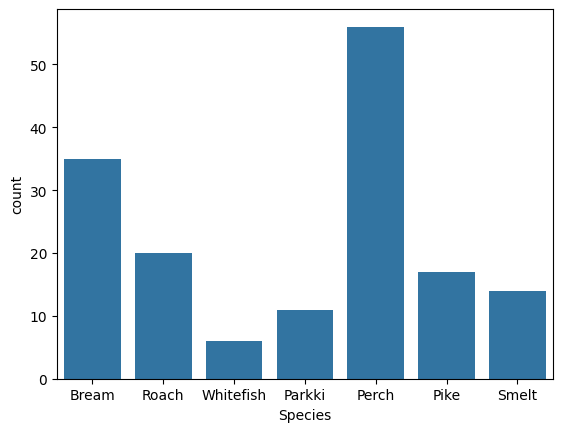

In [173]:
# Visually check if the data is balanced in the form of a bar graph
# Again, the dataset is not balanced among the species
sns.countplot(x='Species', data= df_fish)

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


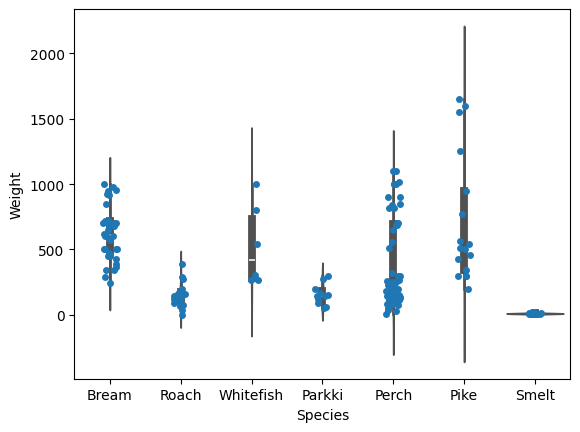

In [174]:
# Compares weights between the different species of fish using a stripplot and a violinplot
# From these plots we can see that the Pike has the greatest variation in weight
# While the Smelt has the least amount of variation in weight
print(sns.stripplot(y ='Weight', x = 'Species', data = df_fish))
print(sns.violinplot(y ='Weight', x = 'Species', data = df_fish))

<Axes: xlabel='Species', ylabel='Length1'>

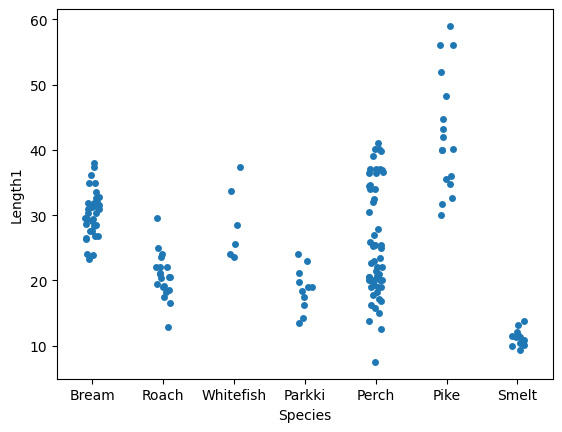

In [175]:
# Compares the Length1 of the different species using a stripplot
sns.stripplot(y ='Length1', x = 'Species', data = df_fish)

In [176]:
# Shows the corrolation of the data to see how closely they are related
# The numbers are between 1 and -1
df_fish.corr(method='pearson')

<ipython-input-176-dcd4decda514>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_fish.corr(method='pearson')


,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


from matplotlib import pyplot as plt
_df_53['Weight'].plot(kind='hist', bins=20, title='Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_54['Length1'].plot(kind='hist', bins=20, title='Length1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_55['Length2'].plot(kind='hist', bins=20, title='Length2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_56['Length3'].plot(kind='hist', bins=20, title='Length3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_57.plot(kind='scatter', x='Weight', y='Length1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_58.plot(kind='scatter', x='Length1', y='Length2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_59.plot(kind='scatter', x='Length2', y='Length3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_60.plot(kind='scatter', x='Length3', y='Height', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_61['Weight'].plot(kind='line', figsize=(8, 4), title='Weight')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_62['Length1'].plot(kind='line', figsize=(8, 4), title='Length1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_63['Length2'].plot(kind='line', figsize=(8, 4), title='Length2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_64['Length3'].plot(kind='line', figsize=(8, 4), title='Length3')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: title={'center': 'Width'}, xlabel='Species'>

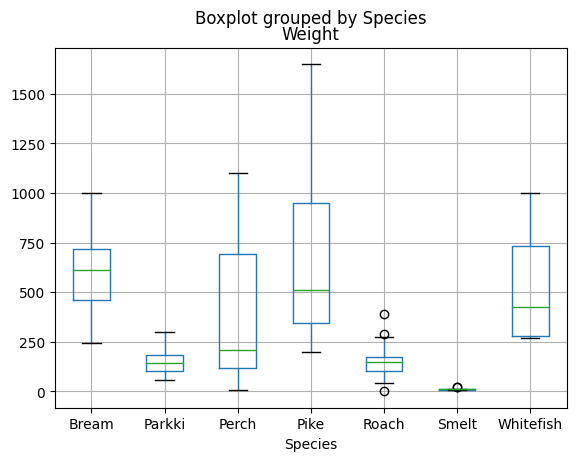

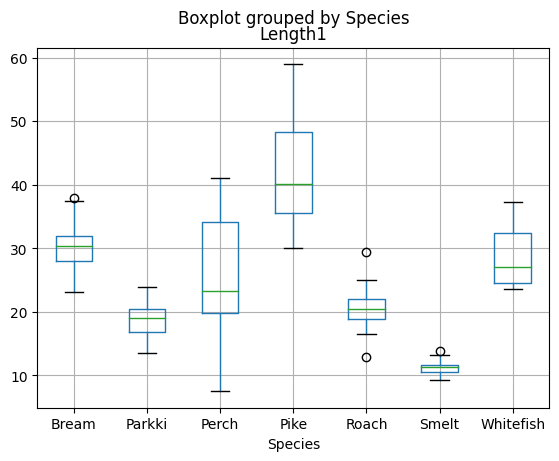

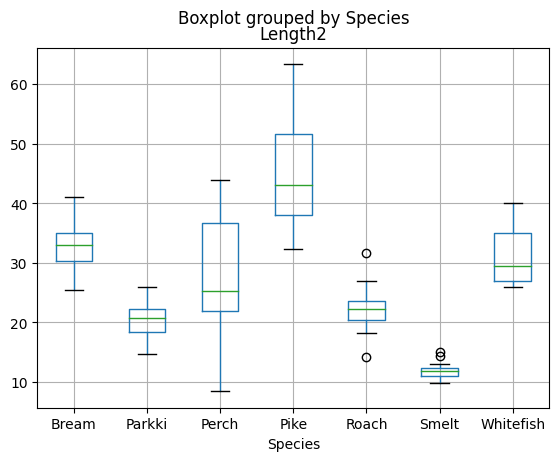

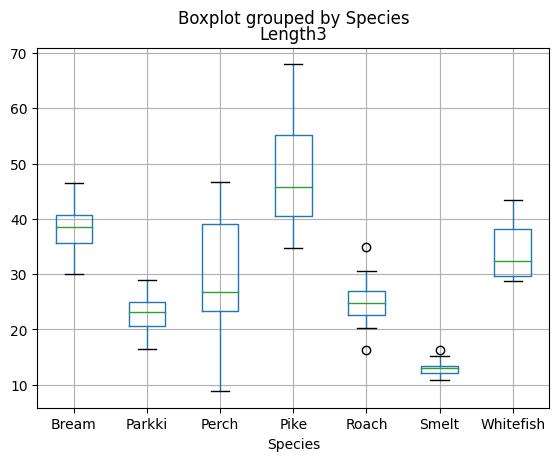

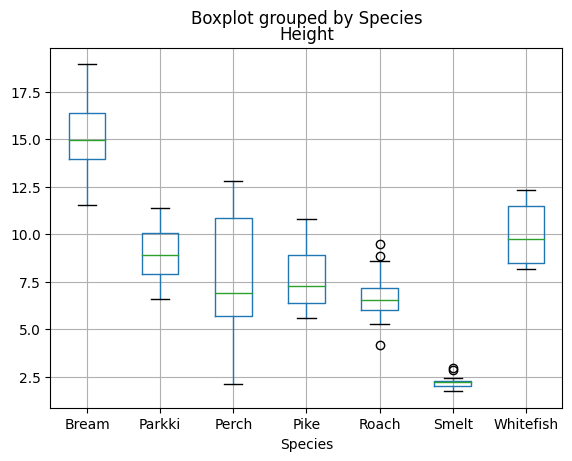

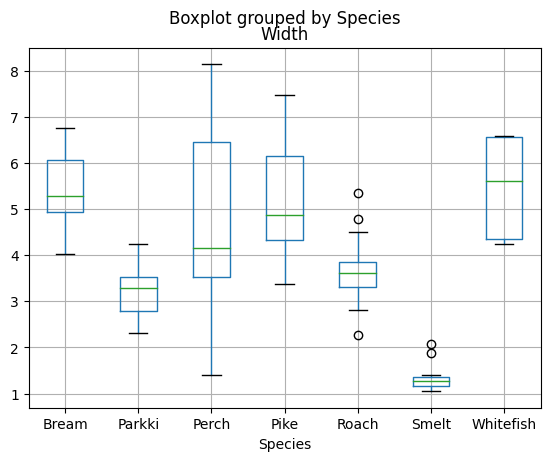

In [177]:
# Box plots to show outliers for each characteristic
# The cirles past the whisker on the top and bottom of each box plot are the outlier data point and should be removed
# Each boxplot is grouped together by species
df_fish.boxplot(column = ['Weight'], by = 'Species')
df_fish.boxplot(column = ['Length1'], by = 'Species')
df_fish.boxplot(column = ['Length2'], by = 'Species')
df_fish.boxplot(column = ['Length3'], by = 'Species')
df_fish.boxplot(column = ['Height'], by = 'Species')
df_fish.boxplot(column = ['Width'], by = 'Species')

(array([40, 52, 54]),)


<Axes: title={'center': 'Width'}, xlabel='Species'>

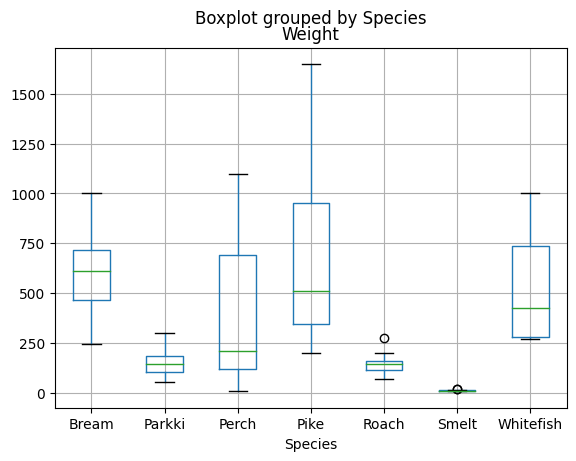

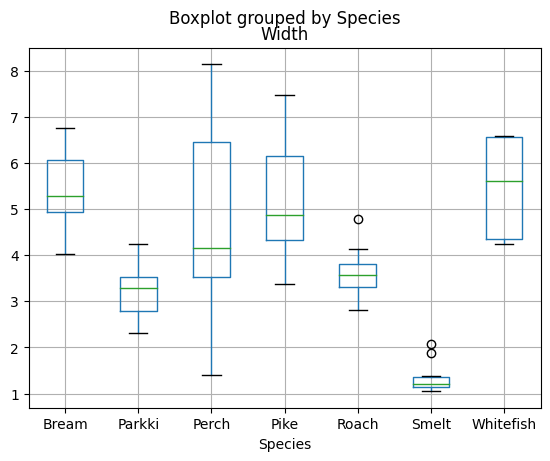

In [178]:
# Uses np.where to return an array of indexes where the values are above or below a certain threshold

# Detect outliers from Roach weight
outliers = np.where((df_fish['Species']== 'Roach') & ((df_fish['Weight']>272) | (df_fish['Weight']<40)))
print(outliers)
# Remove outliers based on index
for x in outliers:
  df_fish.drop(x, inplace=True)

# Detect outliers from Smelt weight
outliers = np.where((df_fish['Species']== 'Smelt') & ((df_fish['Weight']>14)))
# Remove outliers based on index
for x in outliers:
  df_fish.drop(x, inplace=True)

# Detect outliers from Roach Width
outliers = np.where((df_fish['Species']== 'Roach') & ((df_fish['Width']>4.5) | (df_fish['Width']<2.8)))
# Remove outliers based on index
for x in outliers:
  df_fish.drop(x, inplace=True)

# Detect outliers from Smelt Width
outliers = np.where((df_fish['Species']== 'Smelt') & ((df_fish['Width']>1.5)))
# Remove outliers based on index
for x in outliers:
  df_fish.drop(x, inplace=True)

# Reshow Weight and Width boxplots with the previous outliers now removed
df_fish.boxplot(column = ['Weight'], by = 'Species')
df_fish.boxplot(column = ['Width'], by = 'Species')